### <center>Boston House Price Prediction

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
df=pd.read_csv('boston.csv')

### Data Dictionary
Input features in order:
*  CRIM: per capita crime rate by town
*  ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
*  INDUS: proportion of non-retail business acres per town
*  CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*  NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
*  RM: average number of rooms per dwelling
*  AGE: proportion of owner-occupied units built prior to 1940
*  DIS: weighted distances to five Boston employment centres
*  RAD: index of accessibility to radial highways
*  TAX: full-value property-tax rate per \\$10,000 [$/10k]
*  PTRATIO: pupil-teacher ratio by town
*  B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*  LSTAT: % lower status of the population

Output variable:
*  MEDV: Median value of owner-occupied homes in \\$1000's [k$]

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

**There are  506 rows and 14 columns in the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Checking for missing values

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**There are no missing values in the dataset**

### Checking for duplicates

In [7]:
df.duplicated().sum()

0

**There were no duplicate values in the dataset**

### Exploratory Data Analysis

In [8]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


* The minimum and maximum per capita crime rate by town  is 0.00632 & 88.9762 respectively and the average per capita crime rate by town is 3.613524. There is a higher difference average and maximum values.
* The minimum and maximum proportion of residential land zoned for lots over 25,000 sq.ft. is 0 & 100 respectively and the average proportion of residential land zoned for lots over 25,000 sq.ft is 12.5.
* The minimum and maximum proportion of non-retail business acres per town is 0.46 & 27.74 respectively and the average proportion of non-retail business acres per town is 11.14
* Charles River dummy variable is a discrete variable with (1 if tract bounds river; 0 otherwise)
* The minimum and maximum nitric oxides concentration (parts per 10 million) is 0.39 & 0.87 respectively and the average nitric oxides concentration is 0.55
* The minimum and maximum for average number of rooms per dwelling is 3.56 & 8.78 respectively and the average for average number of rooms per dwelling is 6.28
* The minimum and maxmimum age proportion of owner-occupied units is 2.9 & 100 respectively and the average age proportion of owner-occupied units built prior to 1940 is 68.6
* The minimum and maxmimum weighted distances to five Boston employment centres is 1.13 & 12.12 respectively and the average weighted distances to five Boston employment centres is 3.8
* The minimum and maxmimum index of accessibility to radial highways is 1 & 24 respectively and the average index of accessibility to radial highways is 9.55
* The minimum and maximum full-value property-tax rate per $10,000 is 187 & 711 respectively and the average full-value property-tax rate is 408.2
* The minimum and maximum pupil-teacher ratio by town is 12.6 & 22 respectively and the average pupil-teacher ratio by town is 18.45
* The minimum and maximum % lower status of the population is 1.73 & 37.97 respectively and the average % lower status of the population is 12.65
* The minimum and maximum Median value of owner-occupied homes is 5 & 50 respectively and the average Median value of owner-occupied homes is 22.53

### Data Visualization

#### Univariate Analysis

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


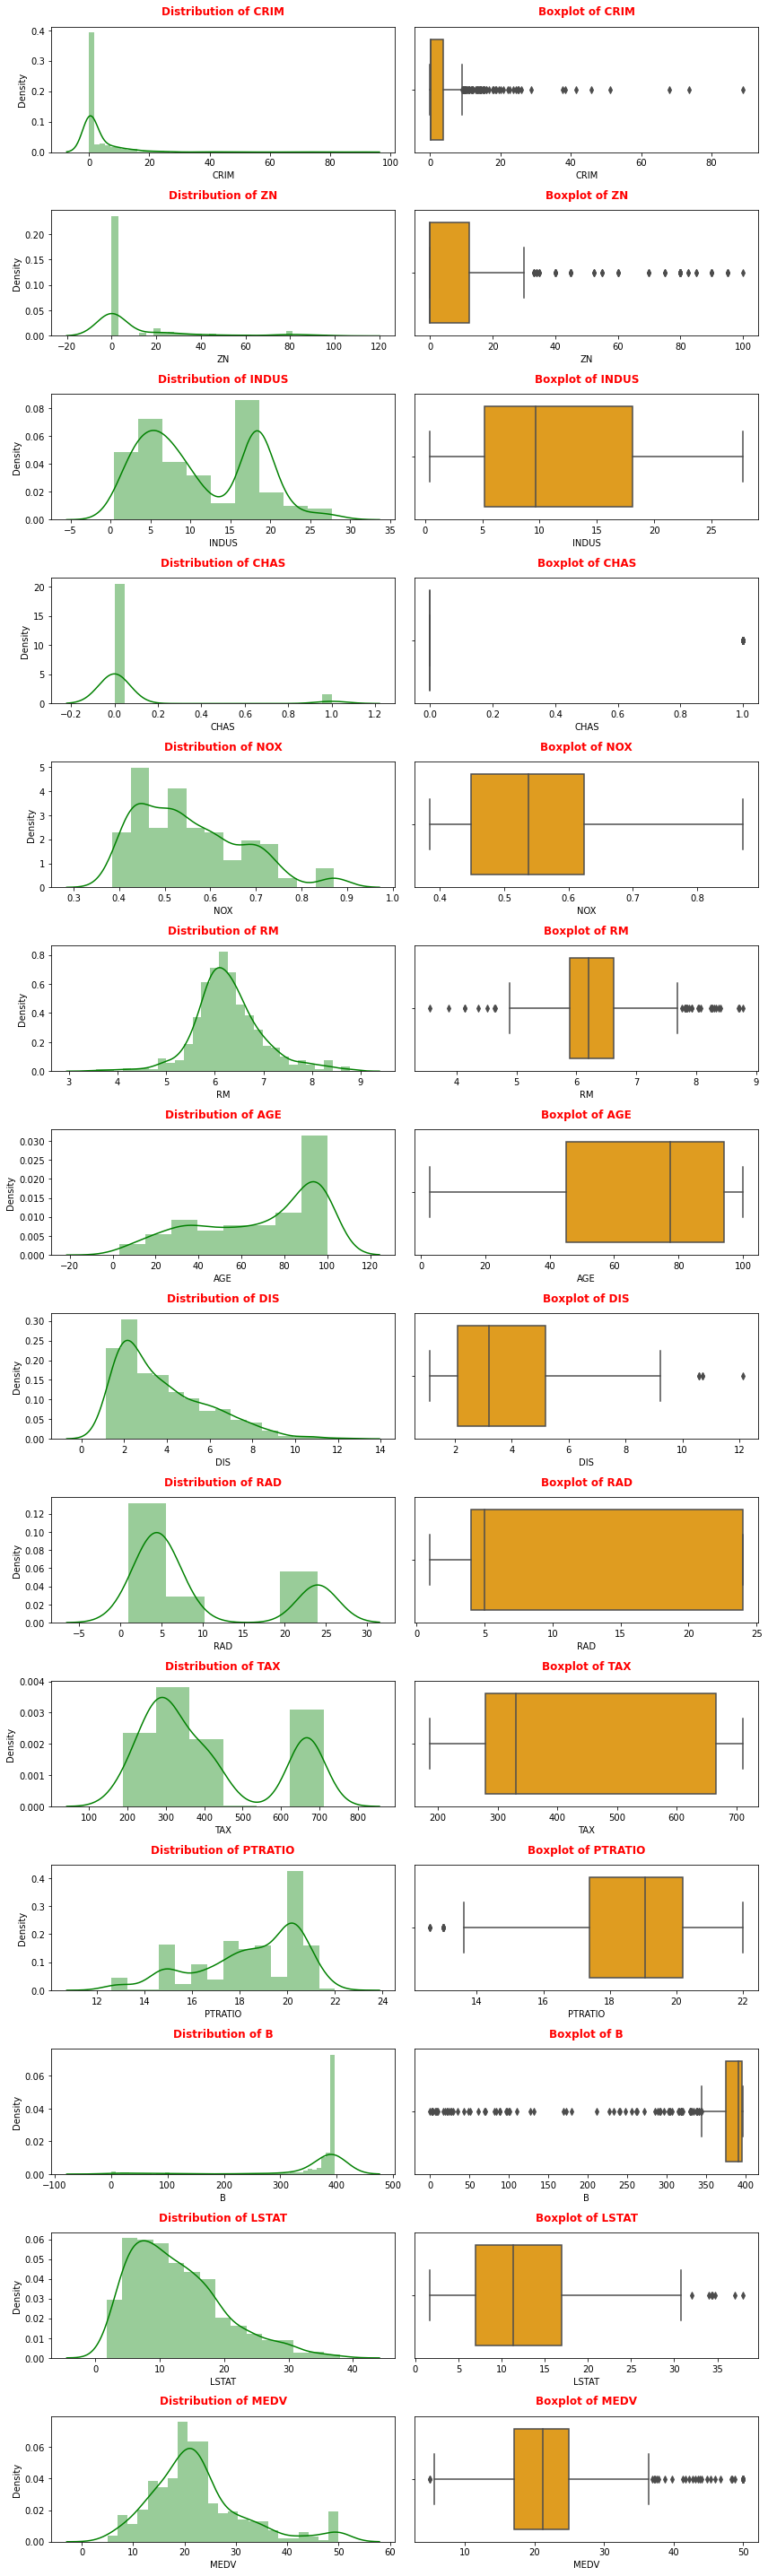

In [10]:
 plt.figure(figsize=(12,40))
for i in range(len(df.columns)):
    plt.subplot(14,2,(i*2)+1)
    sns.distplot(df[df.columns[i]],color='green');
    plt.title('Distribution of {}'.format(df.columns[i]),color='red',weight='bold',y=1.05)
    plt.subplot(14,2,(i*2)+2)
    sns.boxplot(df[df.columns[i]],color='orange');
    plt.title('Boxplot of {}'.format(df.columns[i]),color='red',weight='bold',y=1.05)
    plt.tight_layout()

* Variables "CRIM", "ZN", "RM", "DIS", "PTRATIO", "B", "LSTAT", "MEDV" have outliers

### Skewness of all variables

In [11]:
for i in range(len(df.columns)):
    print('Skewness of',df.columns[i],'is', round(df[df.columns[i]].skew(),5))    

Skewness of CRIM is 5.22315
Skewness of ZN is 2.22567
Skewness of INDUS is 0.29502
Skewness of CHAS is 3.4059
Skewness of NOX is 0.72931
Skewness of RM is 0.40361
Skewness of AGE is -0.59896
Skewness of DIS is 1.01178
Skewness of RAD is 1.00481
Skewness of TAX is 0.66996
Skewness of PTRATIO is -0.80232
Skewness of B is -2.89037
Skewness of LSTAT is 0.90646
Skewness of MEDV is 1.1081


* Variable CRIM is highly right skewed and had outliers on higher side
* Variable ZN is highly right skewed and had outliers on higher side
* Variable INDUS shows two spikes in the distribution which means there is a possibility of two clusters and had no outliers
* Variable CHAS has discrete values
* Variable NOX is slightly right skewed and had no outliers
* Variable RM is almost normally distributed but had outliers on both lower and upper sides
* Variable AGE is left skewed and had no outliers
* Variable DIS is right skewed and had outliers on upper side
* Variable RAD has two spikes in the distribution and had no outliers
* Variable TAX shows two spikes in the distribution which means there is a possibility of two clusters and had no outliers 
* Variable PTRATIO is left skewed and had outliers on lower side
* Variable B is left skewed and had outliers on lower side
* Variabe LSTAT is right skewed and had outliers on higher side
* Variable MDEV is right skewed and had outliers on higher side and lower side

### Count plot for variables with discrete values

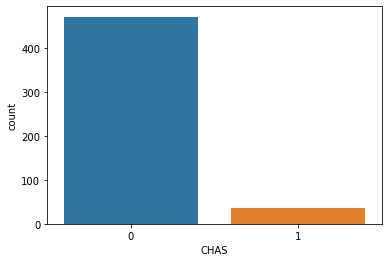

In [12]:
sns.countplot(df.CHAS); #CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

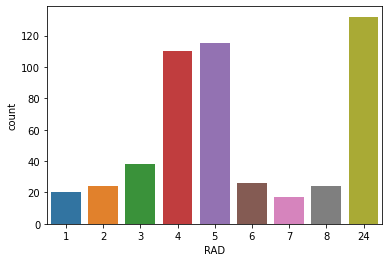

In [13]:
sns.countplot(df.RAD); #RAD: index of accessibility to radial highways

* From the above plots we can observe that there are most records with tracts doesnot bound river
* Most houses have accessibility to radial highways with index 4,5 & 24

#### Bivariate Analysis

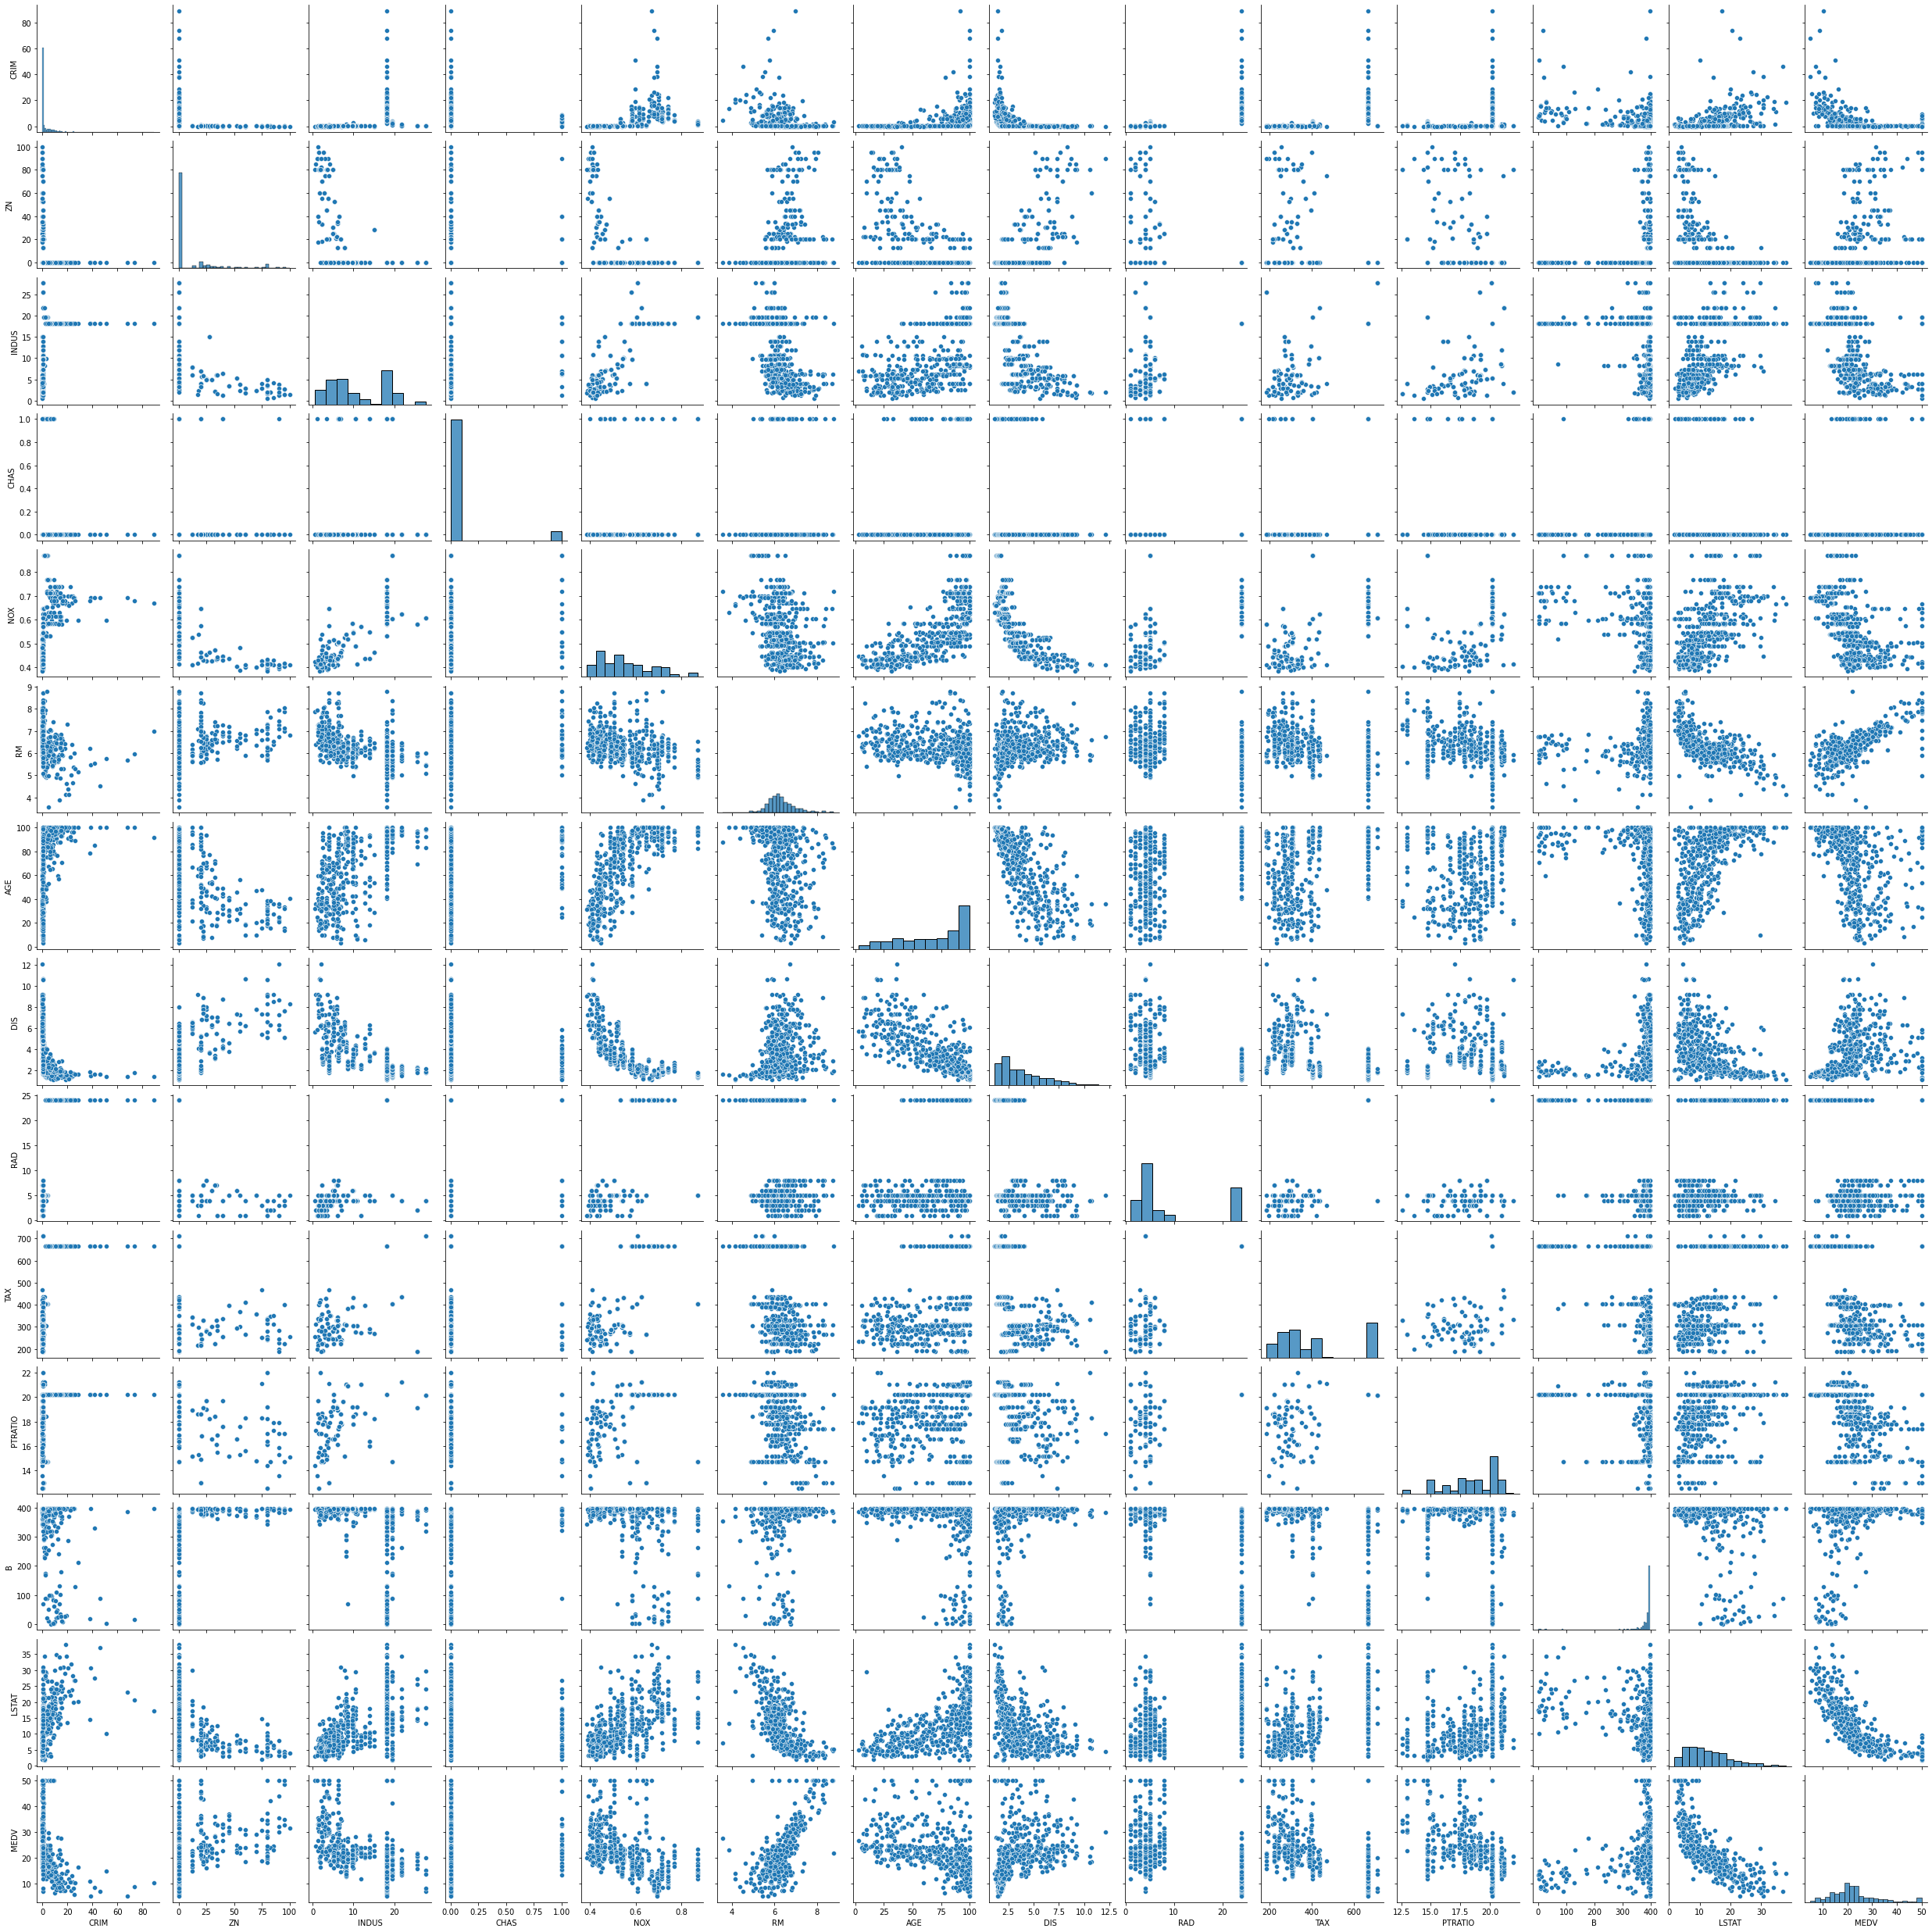

In [14]:
sns.pairplot(df);

Above pair plot shows the relationship between each variables to other variables. The values of correlation can be explained clearly with the help of heat map.

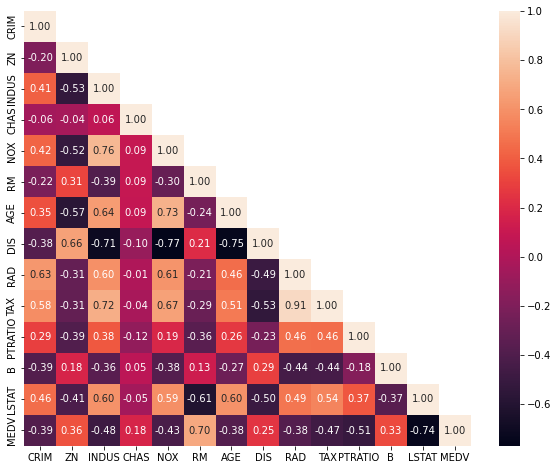

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',mask=np.triu(df.corr(),1));

There are negative and positive correlations between many vriables. The values for correlation can be seen in the above heatmap

### Outlier Treatment
The presence of outliers in a feature will effect the performance of the linear models. So, we need to treat the outliers. We can cap the outliers to lower and upper ranges.

* Before we deal with outliers we drop the "CHAS" variable which have only discrete values 0 & 1

In [16]:
df_new=df.drop('CHAS',axis=1)

In [17]:
df_discrete=pd.DataFrame(df['CHAS'])

In [18]:
result=pd.concat([df_new,df_discrete],axis=1)

In [19]:
def detect_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr=Q1-(1.5*IQR)
    ur=Q1+(1.5*IQR)
    return lr,ur

In [20]:
for i in range(len(df_new.columns)):
    lr,ur=detect_outlier(df[df_new.columns[i]])
    df[df_new.columns[i]]=np.where(df[df_new.columns[i]]<lr,lr,df[df_new.columns[i]])
    df[df_new.columns[i]]=np.where(df[df_new.columns[i]]>ur,ur,df[df_new.columns[i]])

### Plots after removing outliers

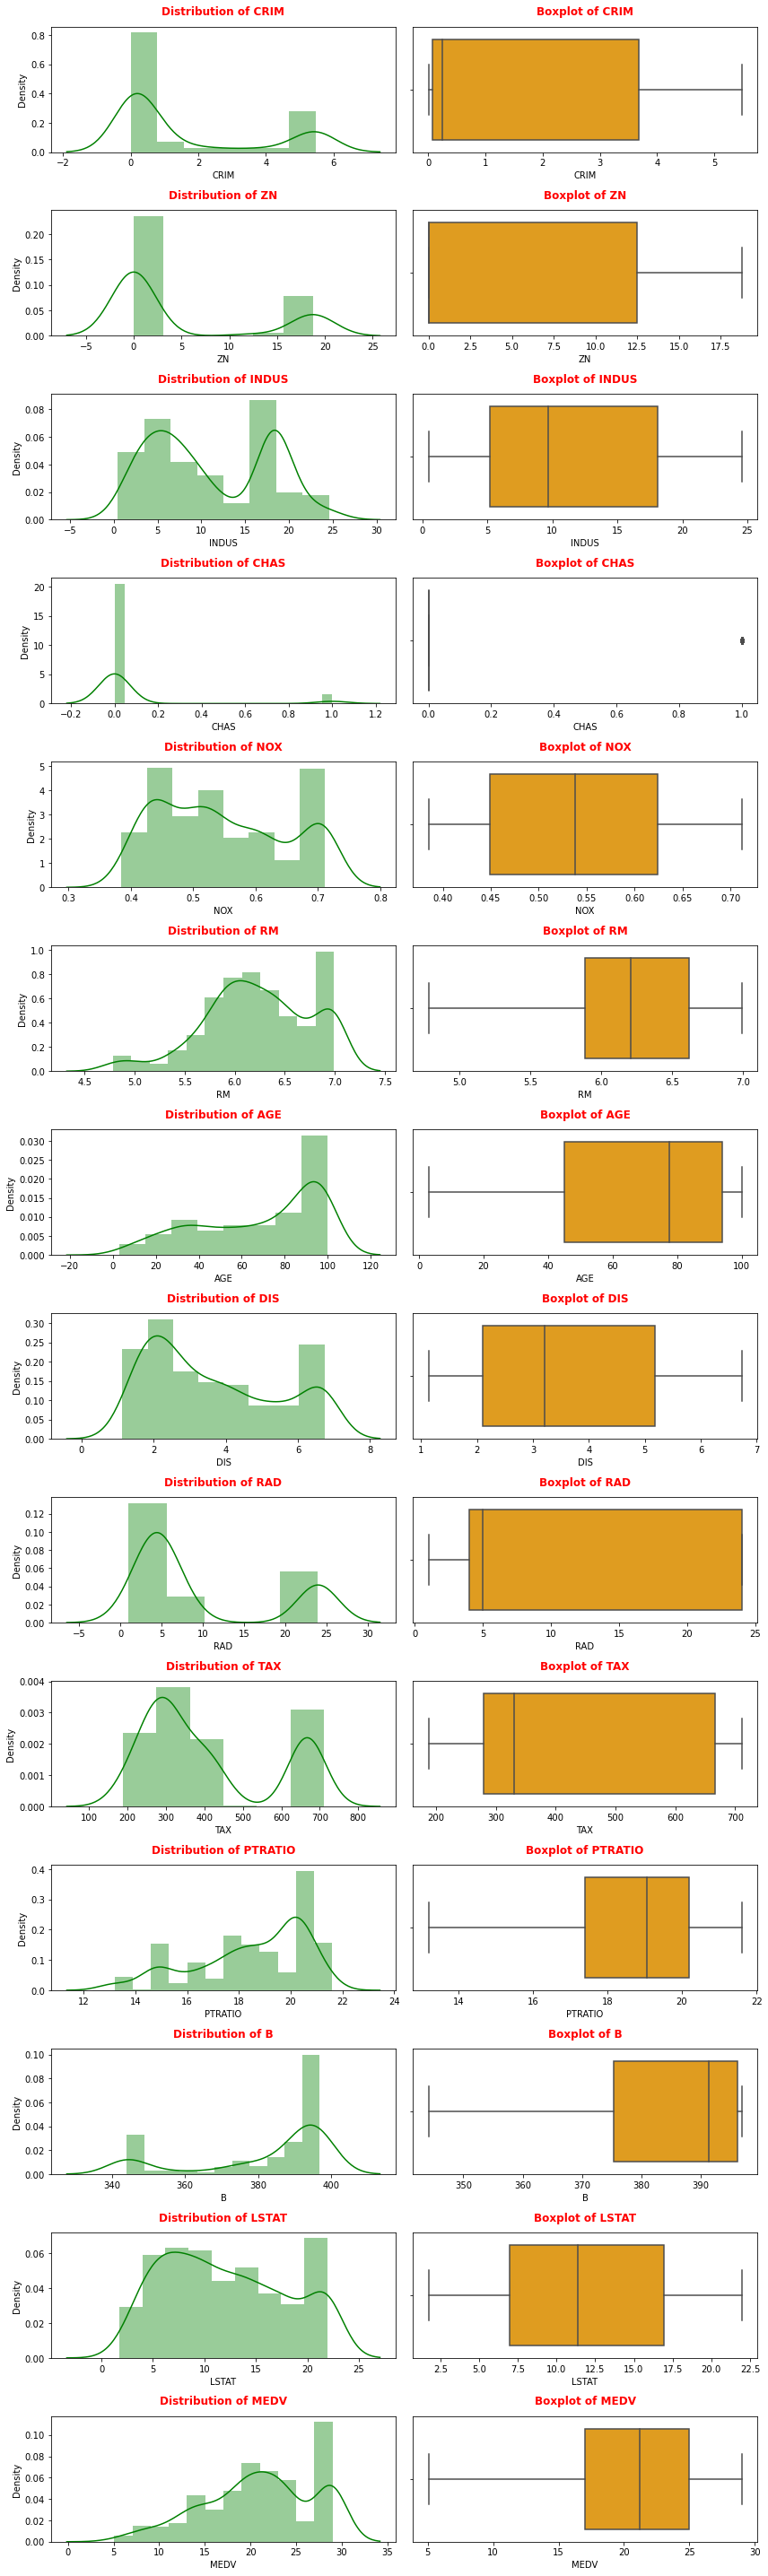

In [21]:
 plt.figure(figsize=(12,40))
for i in range(len(df.columns)):
    plt.subplot(14,2,(i*2)+1)
    sns.distplot(df[df.columns[i]],color='green');
    plt.title('Distribution of {}'.format(df.columns[i]),color='red',weight='bold',y=1.05)
    plt.subplot(14,2,(i*2)+2)
    sns.boxplot(df[df.columns[i]],color='orange');
    plt.title('Boxplot of {}'.format(df.columns[i]),color='red',weight='bold',y=1.05)
    plt.tight_layout()

In [22]:
df.describe().T # Statistical summary after removing outliers

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,1.638608,2.202305,0.00632,0.082045,0.25651,3.677083,5.474601
ZN,506.0,4.837945,8.113073,0.00000,0.000000,0.00000,12.500000,18.750000
INDUS,506.0,11.090158,6.759556,0.46000,5.190000,9.69000,18.100000,24.555000
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.000000
NOX,506.0,0.547864,0.101748,0.38500,0.449000,0.53800,0.624000,0.711500
RM,506.0,6.220187,0.530931,4.77850,5.885500,6.20850,6.623500,6.992500
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.000000
DIS,506.0,3.646566,1.786047,1.12960,2.100175,3.20745,5.188425,6.732550
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.000000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.000000


### Splitting data into training and test set (70:30)

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.5750,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0000
1,0.02731,0.0,7.07,0,0.469,6.4210,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6000
2,0.02729,0.0,7.07,0,0.469,6.9925,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,28.9875
3,0.03237,0.0,2.18,0,0.458,6.9925,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,28.9875
4,0.06905,0.0,2.18,0,0.458,6.9925,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,28.9875


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop('MEDV',axis=1) #Independent variables
y=df.pop('MEDV') #Dependent variables

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

### Scaling
Scaling doesn't effect the performance of the model much,we will get almost an equivalent solution.But scaling helps gradient descent to converage and reach a global minima quickly.So we are going to use scaled data to build our model.

In [27]:
from scipy.stats import zscore

In [28]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [29]:
x_train_scaled=x_train.apply(zscore)
x_test_scaled=x_test.apply(zscore)
y_train_scaled=y_train.apply(zscore)
y_test_scaled=y_test.apply(zscore)

### Model Building

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

### Coefficients for each of the independent attributes

In [32]:
for i,col_name in enumerate(x_train.columns):
    print('The coefficient for{} is {}'.format(col_name,lr.coef_[0][i]))

The coefficient forCRIM is -0.31554206084711767
The coefficient forZN is -0.012134722766560163
The coefficient forINDUS is 0.05285497835269323
The coefficient forCHAS is 0.0650629881424587
The coefficient forNOX is -0.2973143359583858
The coefficient forRM is 0.12632588437585515
The coefficient forAGE is -0.011436165652055571
The coefficient forDIS is -0.2505153244628979
The coefficient forRAD is 0.4431317460345151
The coefficient forTAX is -0.17758334058257758
The coefficient forPTRATIO is -0.2297472764150899
The coefficient forB is 0.04765989445293138
The coefficient forLSTAT is -0.5645295970921538


### Intercept of the model

In [33]:
intercept=lr.intercept_
print("The intercept for the model is {}".format(intercept))

The intercept for the model is [-1.25434986e-16]


### R2 or coeff of determinant for train and test data

In [34]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS
R2_train=lr.score(x_train_scaled,y_train_scaled)
R2_test=lr.score(x_test_scaled,y_test_scaled)

In [35]:
print('R-Sqare for training data is',R2_train)
print('R-Sqare for testing data is',R2_test)

R-Sqare for training data is 0.7966830434134342
R-Sqare for testing data is 0.8065164344459208


Nearly 80% of the variation in the "MEDV" is explained by the predictors in the model for train and test set

In [36]:
from sklearn import metrics

In [37]:
y_train_scaled_predict=lr.predict(x_train_scaled)
y_test_scaled_predict=lr.predict(x_test_scaled)

### RMSE for train and test data

In [38]:
rmse_train=np.sqrt(metrics.mean_squared_error(y_train_scaled,y_train_scaled_predict))
rmse_test=np.sqrt(metrics.mean_squared_error(y_test_scaled,y_test_scaled_predict))

In [39]:
print('RMSE for training data is',rmse_train)
print('RMSE for testing data is',rmse_test)

RMSE for training data is 0.45090681585729636
RMSE for testing data is 0.4398676682299793


### Linear Regression (Using Statsmodel)
R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2

In [40]:
df_train=pd.concat([x_train_scaled,y_train_scaled],axis=1)

In [41]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
13,-0.470561,-0.598001,-0.461967,-0.30429,-0.097442,-0.468267,-0.251175,0.581087,-0.645983,-0.600195,1.198531,0.790501,-0.685061,-0.067330
61,-0.677006,1.714060,-0.907674,-0.30429,-0.921714,-0.436463,0.868243,1.710572,-0.190903,-0.735510,0.585478,-0.205789,0.362106,-0.801868
377,1.713028,-0.598001,1.012862,-0.30429,1.192302,1.112582,1.059536,-1.287119,1.629421,1.511905,0.821267,0.790501,1.514330,-1.252606
39,-0.741943,1.714060,-1.230478,-0.30429,-1.164146,0.740288,-1.668159,0.967947,-0.759754,-0.923775,-0.074733,0.723270,-1.352673,1.366270
365,1.298953,-0.598001,1.012862,-0.30429,1.585043,-2.658071,0.673408,-1.144779,1.629421,1.511905,0.821267,-1.443475,-0.878228,1.117946


**The coefficients for each of the independent variables and the intercept for the model are given below**

In [42]:
import statsmodels.formula.api as smf

In [43]:
expr='MEDV ~ CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [44]:
lm1=smf.ols(formula=expr,data=df_train).fit()
lm1.params

Intercept    2.532696e-16
CRIM        -3.155421e-01
ZN          -1.213472e-02
INDUS        5.285498e-02
CHAS         6.506299e-02
NOX         -2.973143e-01
RM           1.263259e-01
AGE         -1.143617e-02
DIS         -2.505153e-01
RAD          4.431317e-01
TAX         -1.775833e-01
PTRATIO     -2.297473e-01
B            4.765989e-02
LSTAT       -5.645296e-01
dtype: float64

In [45]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     102.5
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          5.05e-109
Time:                        18:39:31   Log-Likelihood:                -220.35
No. Observations:                 354   AIC:                             468.7
Df Residuals:                     340   BIC:                             522.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.533e-16      0.024   1.04e-14      1.0

* We can observe from the above image that R2 and Adjusted R2 are almost equal

**79% of the variability observed in the target variable is explained by the regression model**

* P-Values for variables "ZN", "INDUS", "AGE" and "B" is greater than 0.05. So, we can say that these variables are not statistically significant in predicting the target variable

### RMSE for train and test data

In [46]:
y_train_scaled_predict1=lm1.predict(x_train_scaled)
y_test_scaled_predict1=lm1.predict(x_test_scaled)

In [47]:
rmse_train1=np.sqrt(metrics.mean_squared_error(y_train_scaled,y_train_scaled_predict1))
rmse_test1=np.sqrt(metrics.mean_squared_error(y_test_scaled,y_test_scaled_predict1))

In [48]:
print('RMSE for training data is',rmse_train1)
print('RMSE for testing data is',rmse_test1)

RMSE for training data is 0.45090681585729636
RMSE for testing data is 0.43986766822997947


RMSE's for both models are same

#### Regression plot of our model.

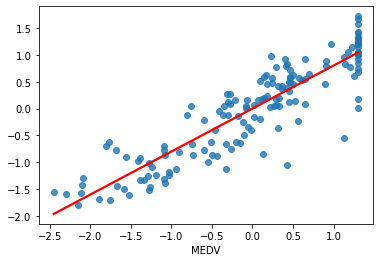

In [57]:
sns.regplot(x=y_test_scaled,y=y_test_scaled_predict,ci=None,line_kws={"color": "red"});

### <center>Thankyou!